# LOADING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr


# Section 1: LOADING COVID19 DATASET


In [2]:
covid_df=pd.read_csv('/Users/sutharsha/Desktop/Courses_and_Internship/NIELIT/ML_COURSE/miniproject_ML/covid19_Confirmed_dataset.csv')
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


## DATA PREPROCESSING

## Data cleaning:
    1. Removing unneeded columns
    2. Data grouping
    

## 1. Removing unneeded columns

The latitude and longitude columns are dropped as they are not required for visualizing

In [4]:
covid_df.drop(["Lat", "Long"], axis = 1, inplace = True) 

In [5]:
covid_df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


## 2. Data grouping

The dataset is grouped with respect to country/region along with sum aggrgation function

In [6]:
corona_countrywise = covid_df.groupby('Country/Region').sum()
corona_countrywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## DATA VISUALIZATION

Visualizing the pre-processed data for India, China & US countries 

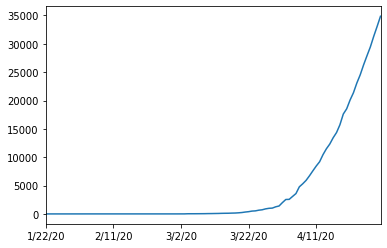

In [7]:
corona_countrywise.loc['India'].plot();

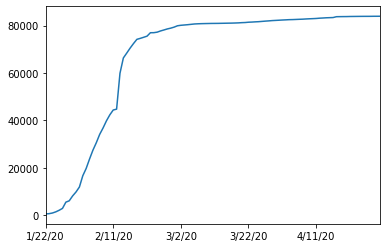

In [8]:
corona_countrywise.loc['China'].plot();

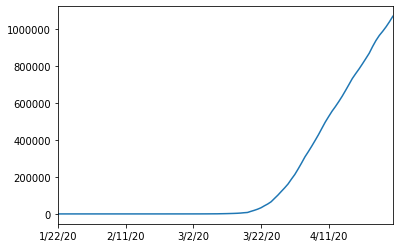

In [9]:
corona_countrywise.loc['US'].plot();

# Section 2: FINDING A GOOD MEASURE

 - Finding the first derivative for the data (as ‘Infection Rate’) and calculate the maximum infection rate for India, China & US. 
 - Also ploting the Infection Rate for some countries 

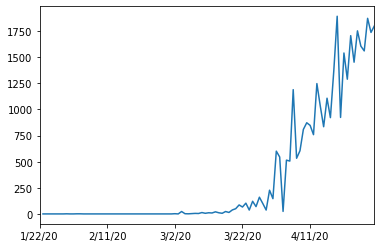

In [10]:
corona_countrywise.loc['India'].diff().plot()

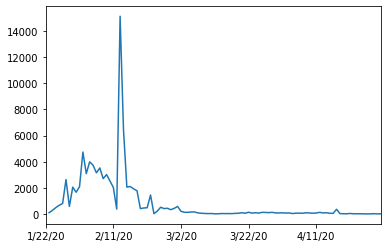

In [11]:
corona_countrywise.loc['China'].diff().plot()

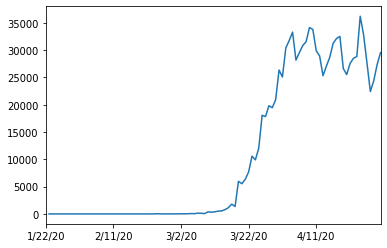

In [12]:
corona_countrywise.loc['US'].diff().plot()

Creating a new dataframe corona data with columnsCountry/Region and max_infection_rate


In [19]:
max_infection_rate = []
for i in corona_countrywise.index:
    max_infection_rate.append(corona_countrywise.loc[i].diff().max())


In [16]:
corona_countrywise['max_infection_rate'] = max_infection_rate

In [17]:
corona_countrywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [18]:
corona_data = pd.DataFrame(corona_countrywise['max_infection_rate'])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


# Section 3: LOADING WORLD HAPPINESS DATASET  

In [20]:
world_df=pd.read_csv('/Users/sutharsha/Desktop/Courses_and_Internship/NIELIT/ML_COURSE/miniproject_ML/worldwide_happiness_report.csv')
world_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## DATA PREPROCESSING

# Data cleaning:
    1. Removing few columns
    2. Setting index 

## 1. Removing few columns

In [21]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [22]:
world_df.drop(["Overall rank", "Score", "Generosity", "Perceptions of corruption"], axis = 1, inplace = True) 

In [24]:
world_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


## 2. Setting index 

In [25]:
world_df = world_df.set_index('Country or region')
world_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## MERGING COVID19 and WORLD HAPPINESS DATA 

In [27]:
data = corona_data.join(world_df,how='inner')
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [ ]:
data['GDP per capita'] = data['GDP per capita'].fillna(0)
data['Freedom to make life choices'] = data['Freedom to make life choices'].fillna(0)
data['Healthy life expectancy'] = data['Healthy life expectancy'].fillna(0)
data['Social support'] = data['Social support'].fillna(0)
data['max_infection_rate'] = data['max_infection_rate'].fillna(0)

In [ ]:
data.head()

# Section 4: VISUALIZING RESULTS

 Plotting GDP vs maximum Infection rate

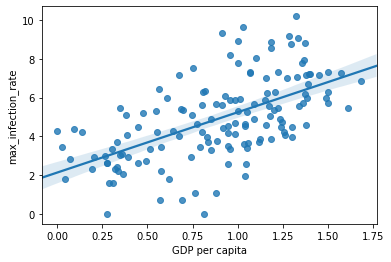

In [30]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

 Plotting Social support vs maximum Infection rate


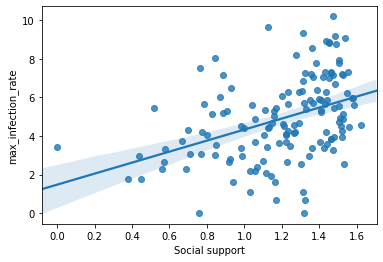

In [31]:
x = data['Social support']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

 Plotting Healthy life expectancy vs maximum Infection rate


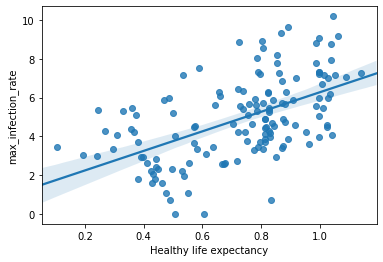

In [32]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

 Plotting Freedom to make life choices vs maximum Infection rate

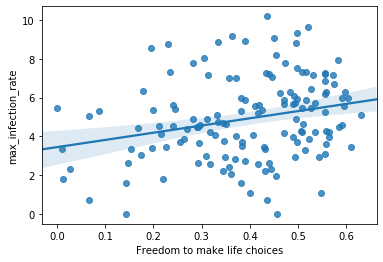

In [33]:
x = data['Freedom to make life choices']
y = data['max_infection_rate']
sns.regplot(x,np.log(y))

## Plotting the correlations between the varialbles

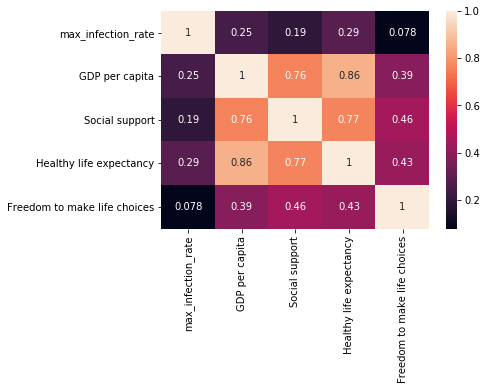

In [34]:
sns.heatmap(data.corr(),annot=True)

In [35]:
data.corr().round(2)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.00,0.25,0.19,0.29,0.08
GDP per capita,0.25,1.00,0.76,0.86,0.39
Social support,0.19,0.76,1.00,0.77,0.46
Healthy life expectancy,0.29,0.86,0.77,1.00,0.43
Freedom to make life choices,0.08,0.39,0.46,0.43,1.00


## OBSERVATIONS:

The relationship between two variables depicting how much one variable is affected by presence of another is statistically termed as their correlation. The correlation generally ranges from -1 to 1, deciding whether it’s positive or not.

The correlation values shows that all the variable max_infection_rate is positively correlated with other variables Freedom to make life choices, GDP per capita, Healthy life expectancy and Social support. This conveys that max_infection_rate is directly proportional to other variables. 

From the above analysis we can infer about the relationship between the spread of the virus in a country and how happy people are, living in that country. The correlation analysis confirms that the spread of the virus in any country is directly proportional to how happy people are, living in that country.